# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* [x] Ver el número de valores nulos
* [x] Representar el porcentaje de filas con atributos nulos.
* [] Limpieza de columnas.
* [] Saber la edad mínima y máxima de las personas del barco.
* [] Conocer la mediana de las edades.
* [] Ver los precios (columna `fares`) más altos y bajos.
* [] Número de pasajeros embarcados (columna `Embarked`).
* [] Ver la distribución de sexos en las personas embarcadas.



## Variables

`PassengerId`: Número de identificación del pasajero 

`Survived`: Variable binaria, que vale _ cuando el pasajero sobrevivió y _ cuando no sobrevivió

`Pclass`: `Clase del viaje (Primera clase, segunda...)???`

`Name`: Nombre del pasajero

`Sex`: Sexo del pasajero

`Age`: Edad del pasajero

`SibSp`: `Número de hijos???`

`Parch`: `???`

`Ticket`: `Código del ticket??`

`Fare`: Tarifa del pasajero, en libras de 1912

`Cabin`: `Ubicación de la cabina del pasajero??`

`Embarked`: `Personas embarcadas en qué??`

## Importamos las librerías

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Leemos el dataset

In [141]:
datos_originales = pd.DataFrame(pd.read_csv("titanic.csv")) 
display(datos_originales) 
df = datos_originales.copy() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Miramos la información de los datos

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


De las 11 variables, 3 tienen datos nulos. En cuanto a los tipos de datos, parecen correctos, aunque `Age` debería ser un int, a no ser que haya edades con decimales explícitamente.

In [143]:
df.isnull().sum() # Para visualizar el número total de valores nulos por columna

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [144]:
df.isnull().sum() / len(df) * 100 # Para visualizar el porcentaje de valores nulos por columna

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Quizá pueda hacerse algo con edad o embarked, pero faltan demasiados datos de Cabin como para intentar estimarlos con los datos ya existentes.

### Edad

In [145]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [146]:
df["Age"].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

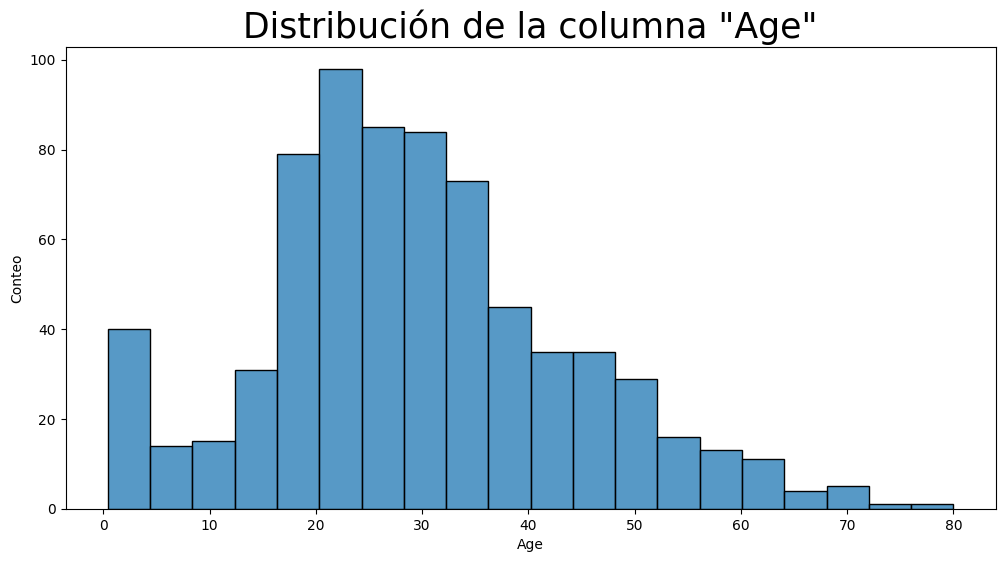

In [147]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'])
plt.title('Distribución de la columna "Age"', size=25)
plt.ylabel('Conteo');

Aquí nos enfrentamos a un problema, y es que, si sustituimos los valores faltantes de `Age` por la media o la mediana, podríamos deformar los datos por juntar demasiados en la media. Para un nivel introductorio está bien, pero quizá a un nivel más profesional podría ser interesante intentar predecir los valores de estas edades faltantes según ciertas características de los pasajeros, como las tarifas.

#### Sustituir por la mediana

In [149]:
df_Age_median = df.copy()
df_Age_median["Age"] = df_Age_median["Age"].fillna(df_Age_median["Age"].median())

In [150]:
df_Age_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Sustituir con KNN

In [151]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [152]:
df_Age_knn = pd.read_csv('titanic.csv')

In [153]:
# Siguiendo tu estrategia , creamos la columna lastname para guardar el apellido de los pasajeros
df_Age_knn['LastName'] = df_Age_knn['Name'].apply(lambda x: x.split(',')[0])

In [154]:
# Vamos a normalizar Fare para asegurarnos que no tenga un impacto desproporcionado en la distancia 
scaler = StandardScaler()
df_Age_knn['Fare'] = scaler.fit_transform(df_Age_knn[['Fare']])

In [155]:
# estas son las columnas que quieres como predictores para tu modelo
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"] #la edad tiene que tenerse en cuenta al predecir, los apellidos es una variable muy random y ruidosa para introducirse

# Aplicamos OneHotEncoder para codificar nuestras variables categóricas 
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_Age_knn[columnas]))
df_encoded.columns = encoder.get_feature_names_out(columnas)

In [156]:
# Creamos dos dataframes basados en la presencia de Age
df_encoded['Age'] = df_Age_knn['Age']
df_with_age = df_encoded.dropna(subset=['Age'])
df_without_age = df_encoded[df_encoded['Age'].isna()].drop(columns='Age')

In [157]:
# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_with_age.drop(columns='Age'), df_with_age['Age'], test_size=0.2, random_state=357)

scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.70730219 105.13201404 123.60082807]
scores = [130.4628458   60.18006121 135.48813665 108.51132836 116.9991268 ]
scores = [117.66245815  67.15095137 127.62349945 110.55036469 131.51371228]
scores = [125.76203809  68.63970772 127.35082789 125.38223218 134.64002067]
scores = [127.75953862  76.2862182  126.66201508 128.28372641 138.96856813]


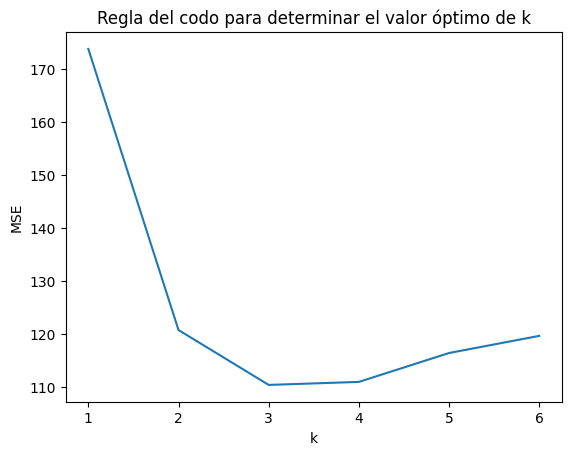

In [158]:
# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
mse = []

# Rango de k para probar
k_range = range(1, 7)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """ estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
        Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')
    

# Graficamos los valores 
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()

# Graficamos 

In [159]:
# Determinar el mejor valor de k
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [160]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(df_without_age)
df_Age_knn.loc[df_Age_knn['Age'].isna(), 'Age'] = imputed_ages

In [161]:
df["Age"][610:620] 

610    39.0
611     NaN
612     NaN
613     NaN
614    35.0
615    24.0
616    34.0
617    26.0
618     4.0
619    26.0
Name: Age, dtype: float64

In [162]:
df_Age_median["Age"][610:620]

610    39.0
611    28.0
612    28.0
613    28.0
614    35.0
615    24.0
616    34.0
617    26.0
618     4.0
619    26.0
Name: Age, dtype: float64

In [119]:
df_Age_knn["Age"][610:620]

610    39.000000
611    26.666667
612    21.666667
613    34.333333
614    35.000000
615    24.000000
616    34.000000
617    26.000000
618     4.000000
619    26.000000
Name: Age, dtype: float64

In [164]:
df_Age_knn["Fare"].describe()

count    8.910000e+02
mean     3.987333e-18
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: Fare, dtype: float64

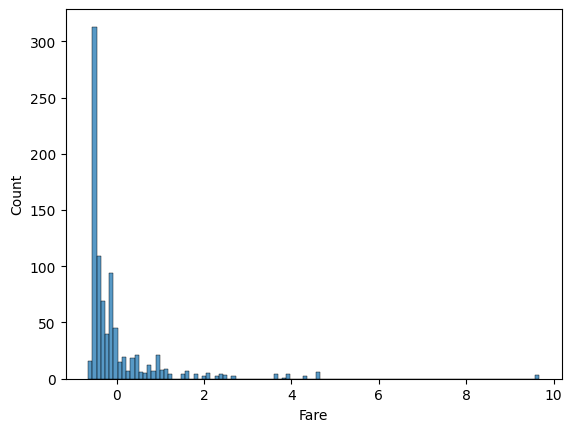

In [169]:
fare_knn = sns.histplot(df_Age_knn['Fare'])

### Embarked

En este caso, como solo faltan 2 datos, podemos asignarles la moda

In [79]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Embarked"].value_counts()

C:\Users\juanv\AppData\Local\Temp\ipykernel_40080\3685397971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### Cabin

In [85]:
df["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [88]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [84]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Al faltar el 77% de los datos, no sería muy recomendable rellenar la información que queda con la que tenemos disponible. Además, al no ser una variable que tome pocos valores, tampoco se puede sustituir por la moda, pues el valor más repetido (que son 3 valores distintos) se repite unas 4 veces. Por lo tanto, tenemos 3 alternativas:

1. En caso de que la variable NO sea importante, considerar eliminar la columna.

2. En caso de que la variable sí sea importante:

    i. Transformar la variable `Cabin` en una variable binaria que tome dos valores: 0 si NO se conocía el valor de la variable, o 1 si SÍ se conocía su valor.

    ii. Dejar la variable tal y como está.